In [1]:
import pandas as pd         ###multigauss2（ノートブック全部）###
import seaborn as sns
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

d = data.loc[:, ["ir", "lidar"]] #光センサとLiDARのデータだけにする

,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


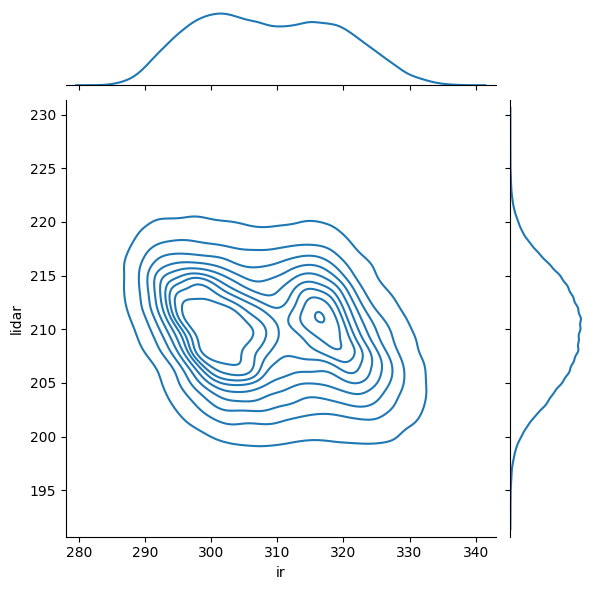

In [2]:
sns.jointplot(d, x="ir", y="lidar", kind="kde") #度数分布を描画 #旧バージョン: sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
d.cov()                                                                    #分散、共分散を計算

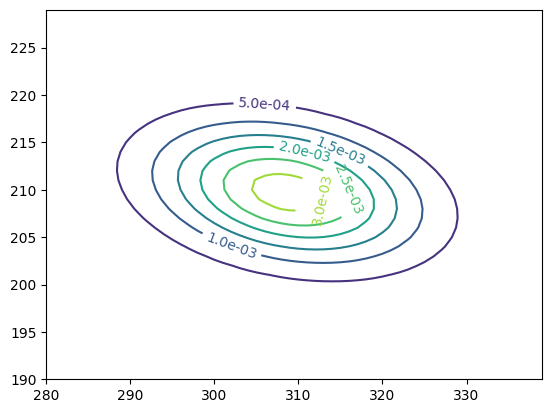

In [3]:
import numpy as np  
from scipy.stats import multivariate_normal
 
x, y = np.mgrid[280:340, 190:230]   
pos = np.empty(x.shape + (2,)) 
pos[:, :, 0] = x   
pos[:, :, 1] = y
 
irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values) #2次元ガウス分布を作る
cont = plt.contour(x, y, irlidar.pdf(pos)) #密度の値の等高線を作る
cont.clabel(fmt='%1.1e')                          #等高線に値の文字列を入れる

plt.show()